In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [2]:
data_train=pd.read_csv("/content/drive/MyDrive/sign_mnist_train.csv")
data_test=pd.read_csv("/content/drive/MyDrive/sign_mnist_test.csv")

In [3]:
# In this section you will have to add another dimension to the data
#training_images = np.expand_dims(training_images, axis=3)
#testing_images = np.expand_dims(testing_images, axis=3)

# Extract features and labels
training_images = data_train.iloc[:,1:].values
training_labels = data_train.iloc[:,0].values
testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

# Reshape and normalize the data
training_images = training_images.reshape(-1, 28, 28, 1) / 255.0
testing_images = testing_images.reshape(-1, 28, 28, 1) / 255.0


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


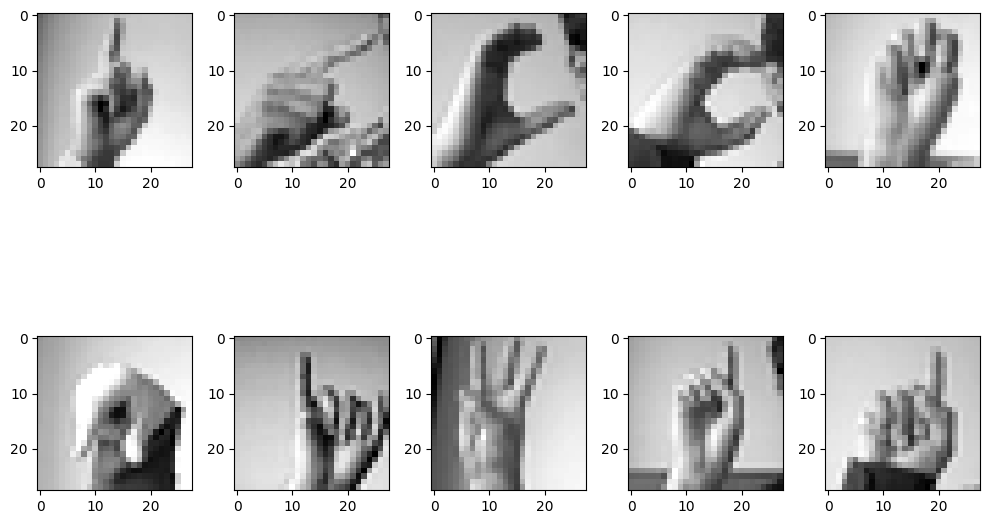

In [4]:
# Plotting the first 10 images
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,5)
fig.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [5]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)

# Keep These
print(training_images.shape)
print(testing_images.shape)

# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [6]:
# Define the ANN model
model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile the model
model_ann.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_ann = model_ann.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

# Evaluate the model
test_loss, test_acc = model_ann.evaluate(testing_images, testing_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
858/858 [==============================] - 13s 14ms/step - loss: 1.7645 - accuracy: 0.4744 - val_loss: 1.4447 - val_accuracy: 0.5506
Epoch 2/10
858/858 [==============================] - 7s 9ms/step - loss: 0.9111 - accuracy: 0.7222 - val_loss: 1.1494 - val_accuracy: 0.6470
Epoch 3/10
858/858 [==============================] - 7s 8ms/step - loss: 0.6118 - accuracy: 0.8178 - val_loss: 0.9997 - val_accuracy: 0.6762
Epoch 4/10
858/858 [==============================] - 7s 8ms/step - loss: 0.4287 - accuracy: 0.8725 - val_loss: 0.9619 - val_accuracy: 0.7096
Epoch 5/10
858/858 [==============================] - 7s 8ms/step - loss: 0.2974 - accuracy: 0.9157 - val_loss: 1.0946 - val_accuracy: 0.6788
Epoch 6/10
858/858 [==============================] - 8s 9ms/step - loss: 0.2067 - accuracy: 0.9448 - val_loss: 0.9935 - val_accuracy: 0.7274
Epoch 7/10
858/858 [==============================] - 7s 8ms/step - loss: 0.1545 - accuracy: 0.9602 - val_loss: 0.9764 - val_accuracy: 0.7289
Epoc

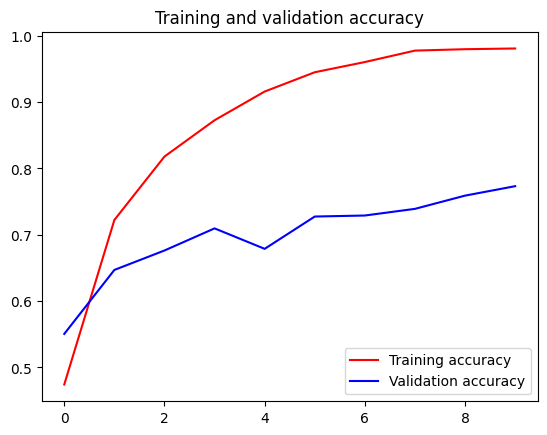

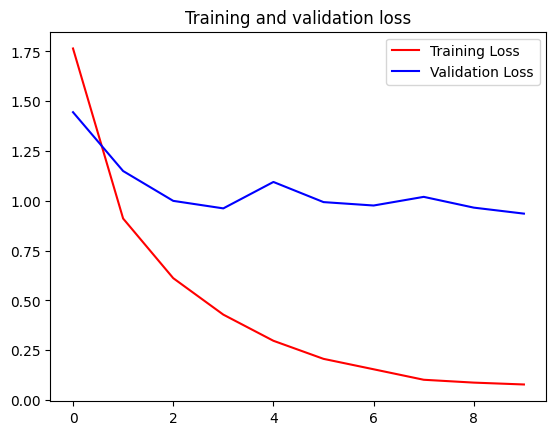

In [7]:
# Plotting accuracy and loss
acc = history_ann.history['accuracy']
val_acc = history_ann.history['val_accuracy']
loss = history_ann.history['loss']
val_loss = history_ann.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.show()

225/225 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       331
           1       0.91      0.96      0.93       432
           2       0.91      0.93      0.92       310
           3       0.87      0.92      0.89       245
           4       0.95      0.90      0.92       498
           5       0.67      0.91      0.78       247
           6       0.81      0.80      0.80       348
           7       0.97      0.81      0.88       436
           8       0.85      0.82      0.84       288
          10       0.00      0.00      0.00       331
          11       0.00      0.00      0.00       209
          12       0.00      0.00      0.00       394
          13       0.06      0.07      0.06       291
          14       0.07      0.07      0.07       246
          15       0.00      0.00      0.00       347
          16       0.00      0.00      0.00       164
          17       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

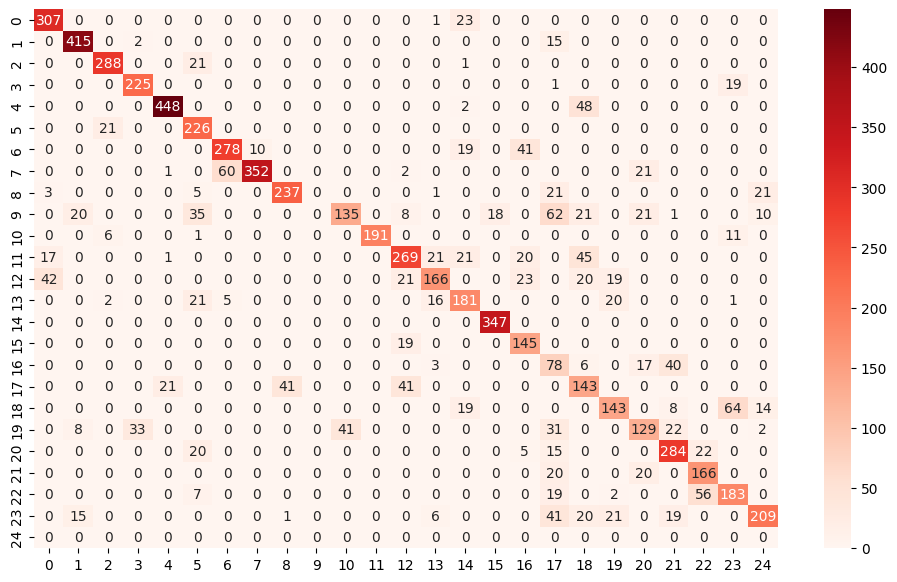

In [8]:
# Predictions
predictions_ann = model_ann.predict(testing_images)
predictions_ann = np.argmax(predictions_ann, axis=-1)
for i in range(len(predictions_ann)):
    if predictions_ann[i] >= 9:
        predictions_ann[i] += 1
predictions_ann[:5]

#Output
#array([ 6,  8, 11, 14, 18])

# Precision, recall, f1-score for all the classes
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

classes = ["Class " + str(i) for i in range(26) if i != 9]
print(classification_report(testing_labels, predictions_ann))


# Confusion matrix
cm = confusion_matrix(testing_labels, predictions_ann)
plt.figure(figsize=(12, 7))
sns.heatmap(cm, cmap='Reds', annot=True, fmt='')
plt.show()